In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./final_data/PhishingDataset.csv')
df.head()

,has_ip,url_length_long,shortining_service,has_at,has_redirection,has_suffix_prefix,has_subdomains,has_non_standard_ports,is_https,is_sixmonth_old_dns,has_dns_record,web_traffic,is_active,Result
0,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,-1,-1,0,1,-1
2,1,0,1,1,1,-1,-1,1,-1,1,-1,1,1,-1
3,1,0,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1
4,1,0,-1,1,1,-1,1,1,1,-1,-1,0,1,1


In [3]:
df.shape

(11055, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   has_ip                  11055 non-null  int64
 1   url_length_long         11055 non-null  int64
 2   shortining_service      11055 non-null  int64
 3   has_at                  11055 non-null  int64
 4   has_redirection         11055 non-null  int64
 5   has_suffix_prefix       11055 non-null  int64
 6   has_subdomains          11055 non-null  int64
 7   has_non_standard_ports  11055 non-null  int64
 8   is_https                11055 non-null  int64
 9   is_sixmonth_old_dns     11055 non-null  int64
 10  has_dns_record          11055 non-null  int64
 11  web_traffic             11055 non-null  int64
 12  is_active               11055 non-null  int64
 13  Result                  11055 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


In [5]:
df.isna().sum()

has_ip                    0
url_length_long           0
shortining_service        0
has_at                    0
has_redirection           0
has_suffix_prefix         0
has_subdomains            0
has_non_standard_ports    0
is_https                  0
is_sixmonth_old_dns       0
has_dns_record            0
web_traffic               0
is_active                 0
Result                    0
dtype: int64

In [6]:
df.Result.unique()

array([-1,  1], dtype=int64)

In [7]:
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

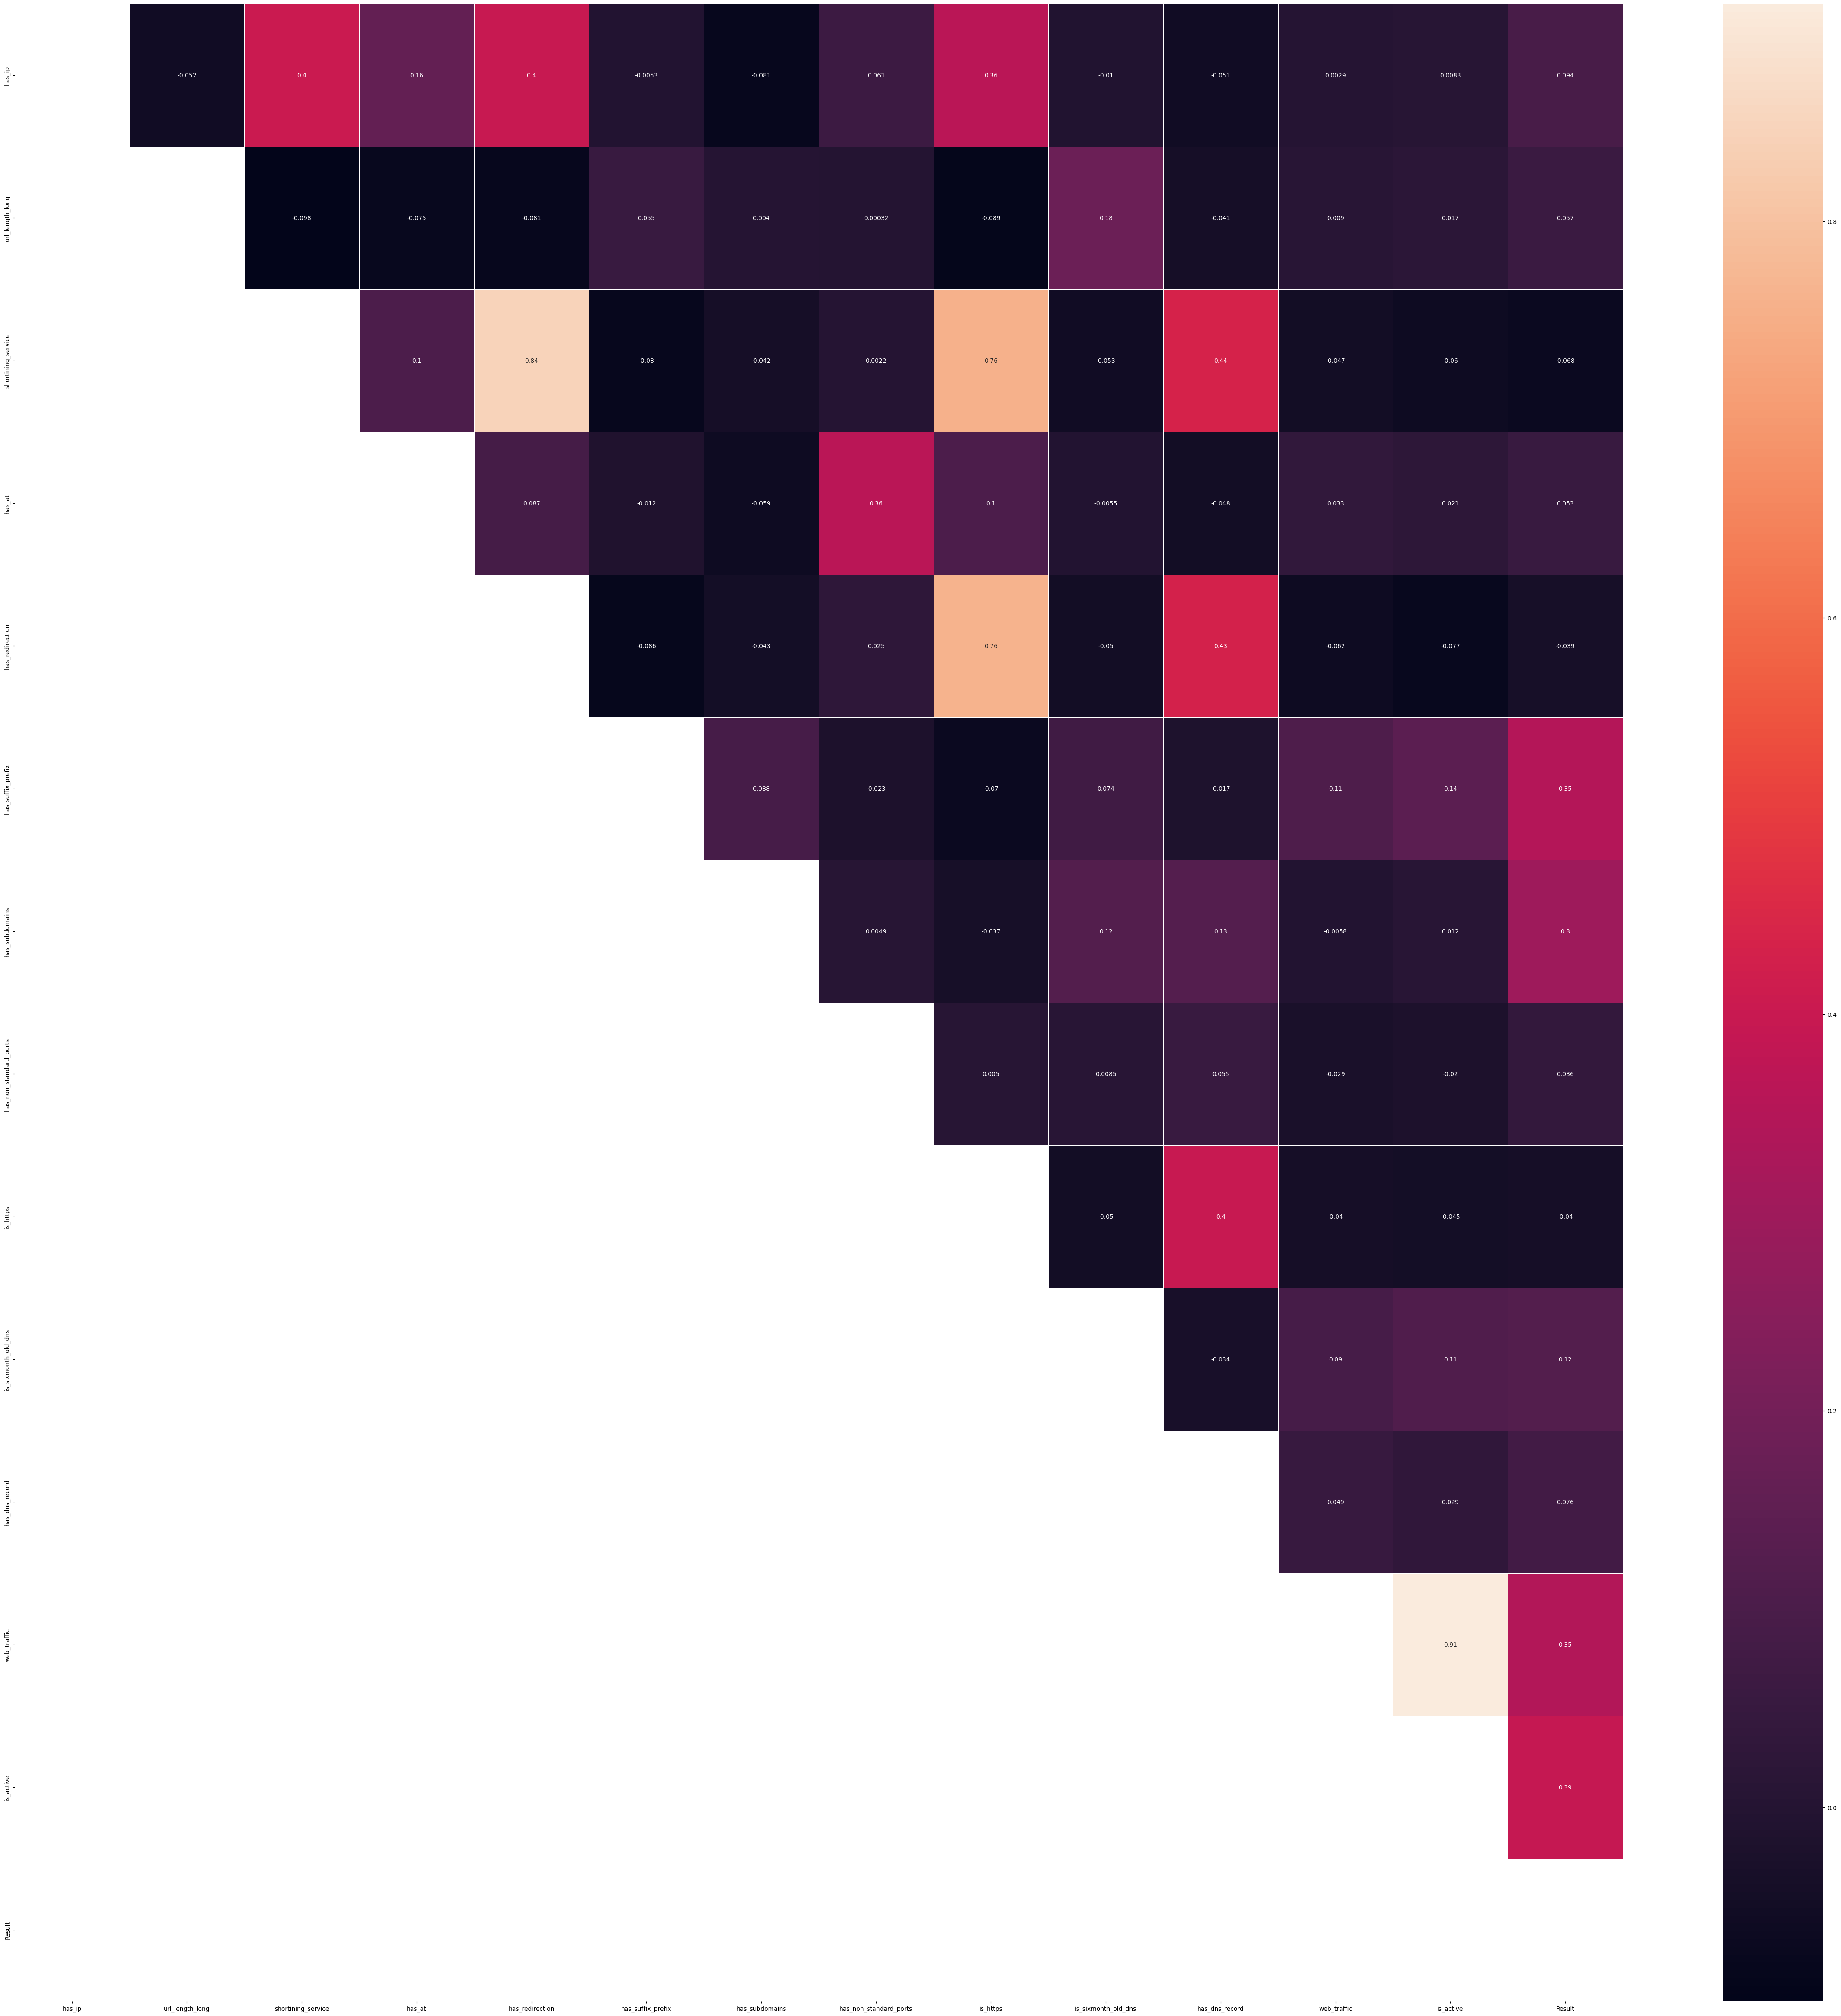

In [8]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
plt.figure(figsize=(60, 60))
sns.heatmap(corr, annot=True, linewidth=0.4)
plt.show()

In [9]:
corr[corr['Result'] > 0.7]['Result']

Series([], Name: Result, dtype: float64)

In [10]:
corr_columns = list(set([j for i, j in zip(*np.where(np.abs(corr) > 0.7)) if i != j]))
cols = corr.columns[corr_columns]
cols

Index(['is_https', 'has_redirection', 'is_active'], dtype='object')

In [11]:
preprocessed_df = df.drop(columns=cols, axis=1)

In [12]:
for col in preprocessed_df.columns:
    if len(preprocessed_df[col].unique()) == 2:
        preprocessed_df[col] = preprocessed_df[col].apply(lambda x: x+1 if x<0 else x)
    elif len(preprocessed_df[col].unique()) == 3:
        preprocessed_df[col] = preprocessed_df[col].apply(lambda x: x+1)

In [13]:
preprocessed_df.to_csv('./final_data/PhishingDatasetPreprocessed.csv', index=False)

In [14]:
shuffle_df = preprocessed_df.sample(frac=1)
test_size = int(0.25 * shuffle_df.shape[0])

test_data = shuffle_df[:test_size]
train_data = shuffle_df[test_size:]

train_data.to_csv('./final_data/Phishing_train_dataset.csv', index=False)
test_data.to_csv('./final_data/Phishing_test_dataset.csv', index=False)